In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2019-03-18 15:05:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   140MB/s    in 1.0s    

2019-03-18 15:05:26 (140 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
# extract images
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directories for horse and human pictures
base_dir = '/tmp/horse-or-human'
train_horse_dir = os.path.join(base_dir, 'horses')
train_human_dir = os.path.join(base_dir, 'humans')

In [5]:
# look at some file names
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse21-0.png', 'horse18-5.png', 'horse08-6.png', 'horse16-9.png', 'horse32-0.png', 'horse18-0.png', 'horse37-3.png', 'horse01-4.png', 'horse17-6.png', 'horse38-0.png']
['human02-07.png', 'human09-27.png', 'human01-06.png', 'human04-09.png', 'human17-19.png', 'human04-20.png', 'human09-03.png', 'human01-15.png', 'human12-18.png', 'human04-29.png']


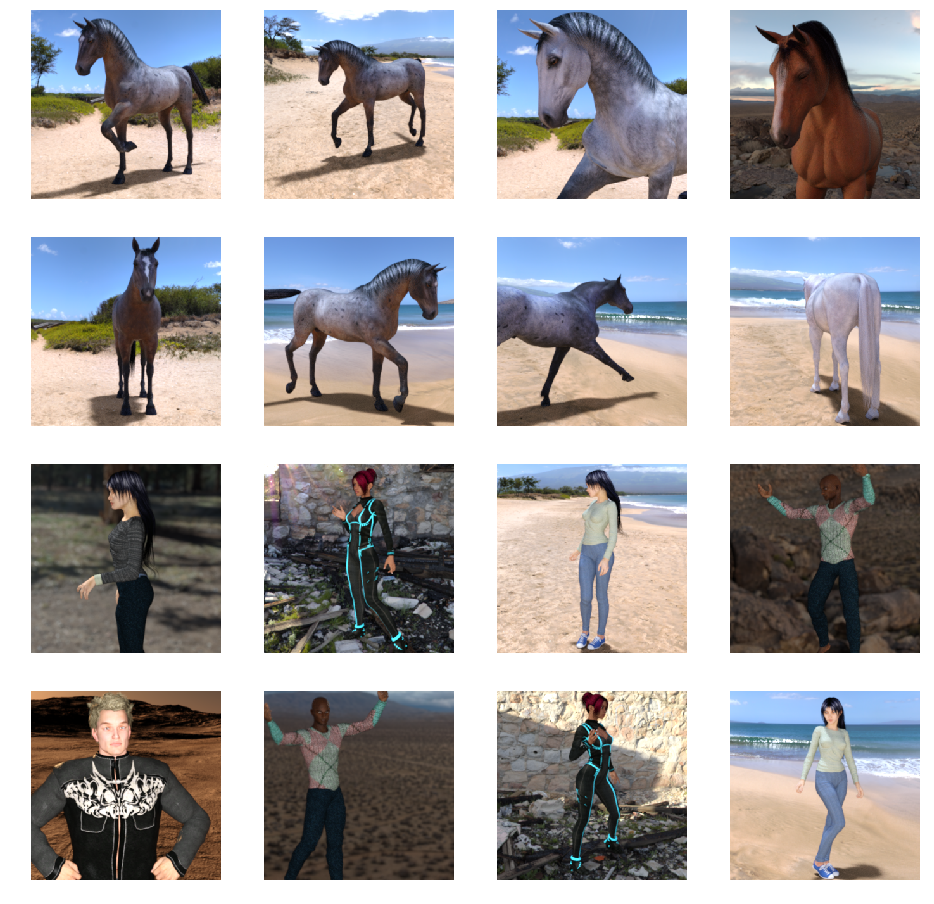

In [12]:
# check some of the pitures

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_horse_pics = [os.path.join(train_horse_dir, fname)
                 for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pics = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pics + next_human_pics):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [16]:
# Building the model

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
# compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['acc'])

In [20]:
# Image preprocessing 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(base_dir,
                                                   target_size=(300, 300),
                                                   batch_size=128,
                                                   class_mode='binary')

Found 1027 images belonging to 2 classes.


In [21]:
# training

history = model.fit_generator(train_generator,
                             steps_per_epoch=8,
                             epochs=15,
                             verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
9/9 [==============================] - 8s 941ms/step - loss: 1.1066 - acc: 0.5024
Epoch 2/15
9/9 [==============================] - 8s 887ms/step - loss: 0.6841 - acc: 0.5297
Epoch 3/15
9/9 [==============================] - 8s 877ms/step - loss: 1.1617 - acc: 0.7040
Epoch 4/15
9/9 [==============================] - 8s 877ms/step - loss: 0.5627 - acc: 0.6709
Epoch 5/15
9/9 [==============================] - 8s 875ms/step - loss: 0.3859 - acc: 0.8384
Epoch 6/15
9/9 [==============================] - 8s 914ms/step - loss: 0.2975 - acc: 0.8870
Epoch 7/15
9/9 [==============================] - 8s 888ms/step - loss: 0.3170 - acc: 0.8880
Epoch 8/15
9/9 [==============================] - 8s 891ms/step - loss: 0.3690 - acc: 0.8393
Epoch 9/15
9/9 [==============================] - 8s 880ms/step - loss: 0.1260 - acc: 0.9562
Epoch 10/15
9/9 [==============================] - 8s 885ms/step - loss: 0.1363 - acc: 0.9455
Epoch 11/15
9/9 [====

In [34]:
# Using model for prediction

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Horse_with_clothes.jpg to Horse_with_clothes.jpg
Saving horse1.jpg to horse1.jpg
Saving human1.jpg to human1.jpg
Saving two_horses.jpg to two_horses.jpg
[1.]
Horse_with_clothes.jpg is a human
[0.]
horse1.jpg is a horse
[0.]
human1.jpg is a horse
[0.]
two_horses.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


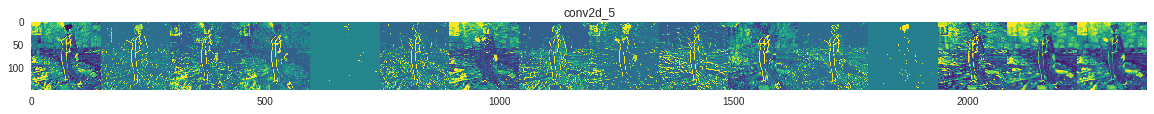

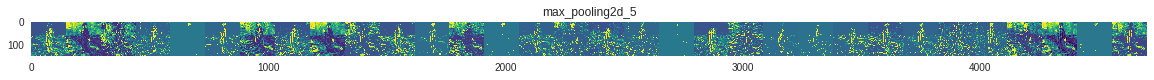

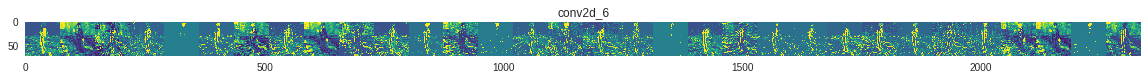

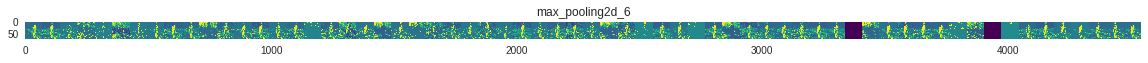

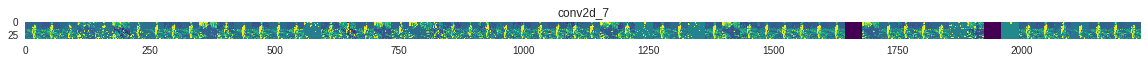

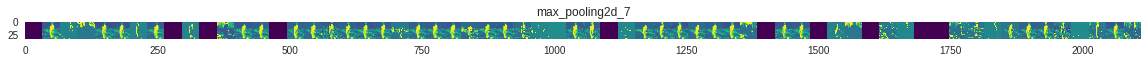

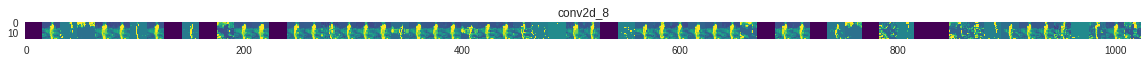

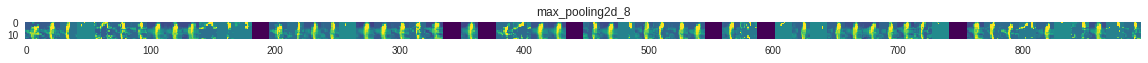

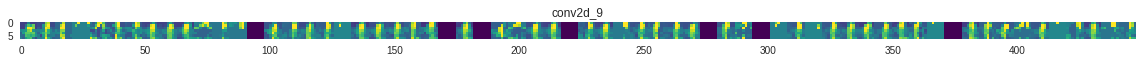

In [35]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')